

# Carbon Dioxide Emission of Cars


<h4>About this Notebook</h4>
We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.


### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import plotly.express as px
%matplotlib inline
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['font.size'] = 18


<h2>Understanding the Data</h2>



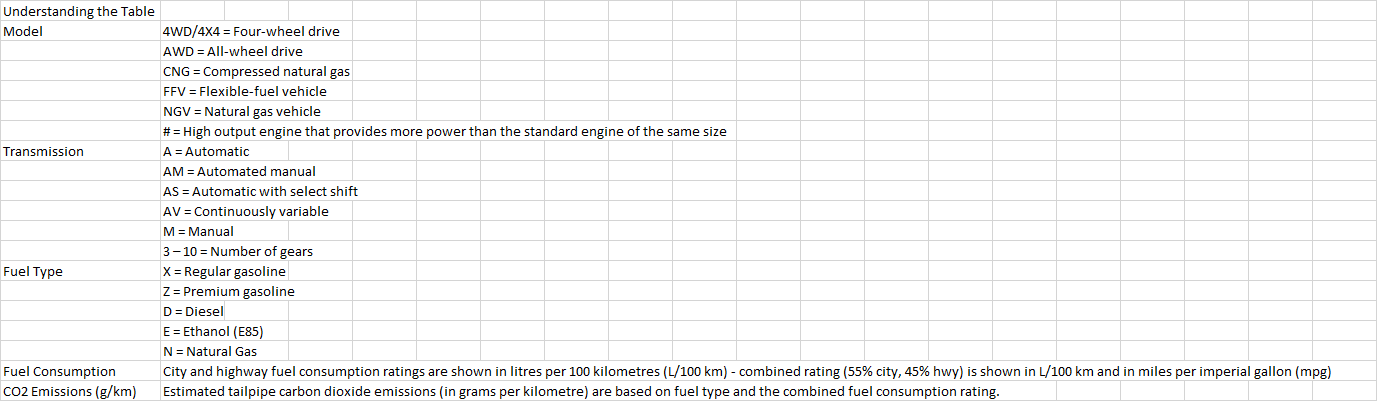

<h2 >Reading the data</h2>

In [2]:
!wget "https://www.nrcan.gc.ca/sites/www.rncan.gc.ca/files/oee/files/csv/Original%20MY2000-2014%20Fuel%20Consumption%20Ratings%20(2-cycle).csv"

--2020-10-17 15:47:17--  https://www.nrcan.gc.ca/sites/www.rncan.gc.ca/files/oee/files/csv/Original%20MY2000-2014%20Fuel%20Consumption%20Ratings%20(2-cycle).csv
Resolving www.nrcan.gc.ca (www.nrcan.gc.ca)... 198.103.48.143
Connecting to www.nrcan.gc.ca (www.nrcan.gc.ca)|198.103.48.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3946260 (3.8M) [text/csv]
Saving to: ‘Original MY2000-2014 Fuel Consumption Ratings (2-cycle).csv’

Original MY2000-201 100%[===================>]   3.76M   896KB/s    in 6.0s    

2020-10-17 15:47:24 (642 KB/s) - ‘Original MY2000-2014 Fuel Consumption Ratings (2-cycle).csv’ saved [3946260/3946260]



In [3]:
df = pd.read_csv("/content/Original MY2000-2014 Fuel Consumption Ratings (2-cycle).csv",nrows=14255)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,4,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df = df[df.columns[:13]]
df.columns=['Model_Year','Make','Model','Vehicle_Class','Engine_Size','Cylinders','Transmission','Fuel','Fuel_Consumption','HWY','COMB_L','COMB_MPG','CO2_Emissions']
df=df[1:-1]

In [5]:
df

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel,Fuel_Consumption,HWY,COMB_L,COMB_MPG,CO2_Emissions
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35,186
2,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37,175
3,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28,230
4,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25,264
5,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14249,2014,VOLVO,XC60 AWD,SUV - SMALL,3,6.0,AS6,X,11.9,8.3,10.3,27,237
14250,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,11.7,8,10,28,230
14251,2014,VOLVO,XC70 AWD,SUV - SMALL,3,6.0,AS6,X,11.9,8.3,10.3,27,237
14252,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,11.4,7.8,9.8,29,225


<h2>Data Exploration</h2>

In [6]:
df.dtypes

Model_Year           object
Make                 object
Model                object
Vehicle_Class        object
Engine_Size          object
Cylinders           float64
Transmission         object
Fuel                 object
Fuel_Consumption     object
HWY                  object
COMB_L               object
COMB_MPG             object
CO2_Emissions        object
dtype: object

In [7]:
df.Model_Year = df.Model_Year.astype(int)
df.Engine_Size = df.Engine_Size.astype(float)
df.Fuel_Consumption = df.Fuel_Consumption.astype(float)
df.HWY = df.HWY.astype(float)
df.COMB_L = df.COMB_L.astype(float)
df.COMB_MPG = df.COMB_MPG.astype(float)
df.CO2_Emissions = df.CO2_Emissions.astype(int)

In [8]:
df.dtypes

Model_Year            int64
Make                 object
Model                object
Vehicle_Class        object
Engine_Size         float64
Cylinders           float64
Transmission         object
Fuel                 object
Fuel_Consumption    float64
HWY                 float64
COMB_L              float64
COMB_MPG            float64
CO2_Emissions         int64
dtype: object

In [9]:
df.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption,HWY,COMB_L,COMB_MPG,CO2_Emissions
count,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000
mean,2007.591875,3.477850,5.991230,12.934456,8.831348,11.089637,27.285624,248.790149
std,4.132870,1.311102,1.774154,3.541439,2.338169,2.969484,7.425910,59.077190
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,2.400000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,3.400000,6.000000,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,4.400000,8.000000,14.900000,10.200000,12.800000,31.000000,285.000000
max,2014.000000,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


In [10]:
df.describe(include='object')

,Make,Model,Vehicle_Class,Transmission,Fuel
count,14253,14253,14253,14253,14253
unique,51,2518,17,24,5
top,CHEVROLET,JETTA,SUV,A4,X
freq,1464,74,2640,3499,7798


Text(0.5, 1.0, 'Correlation of attributes with label')

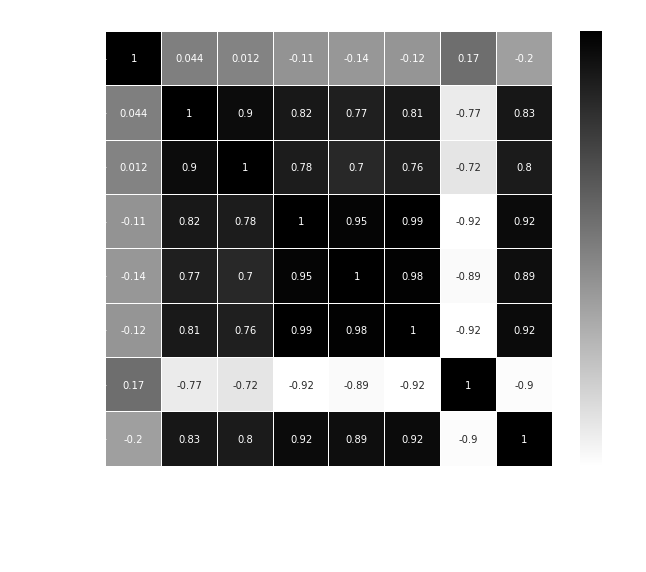

In [11]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),cmap='binary',annot=True,linewidths=0.1)
plt.title("Correlation of attributes with label",fontdict={'color':'white','fontsize':24})

In [12]:
!pip install seaborn==0.11.0

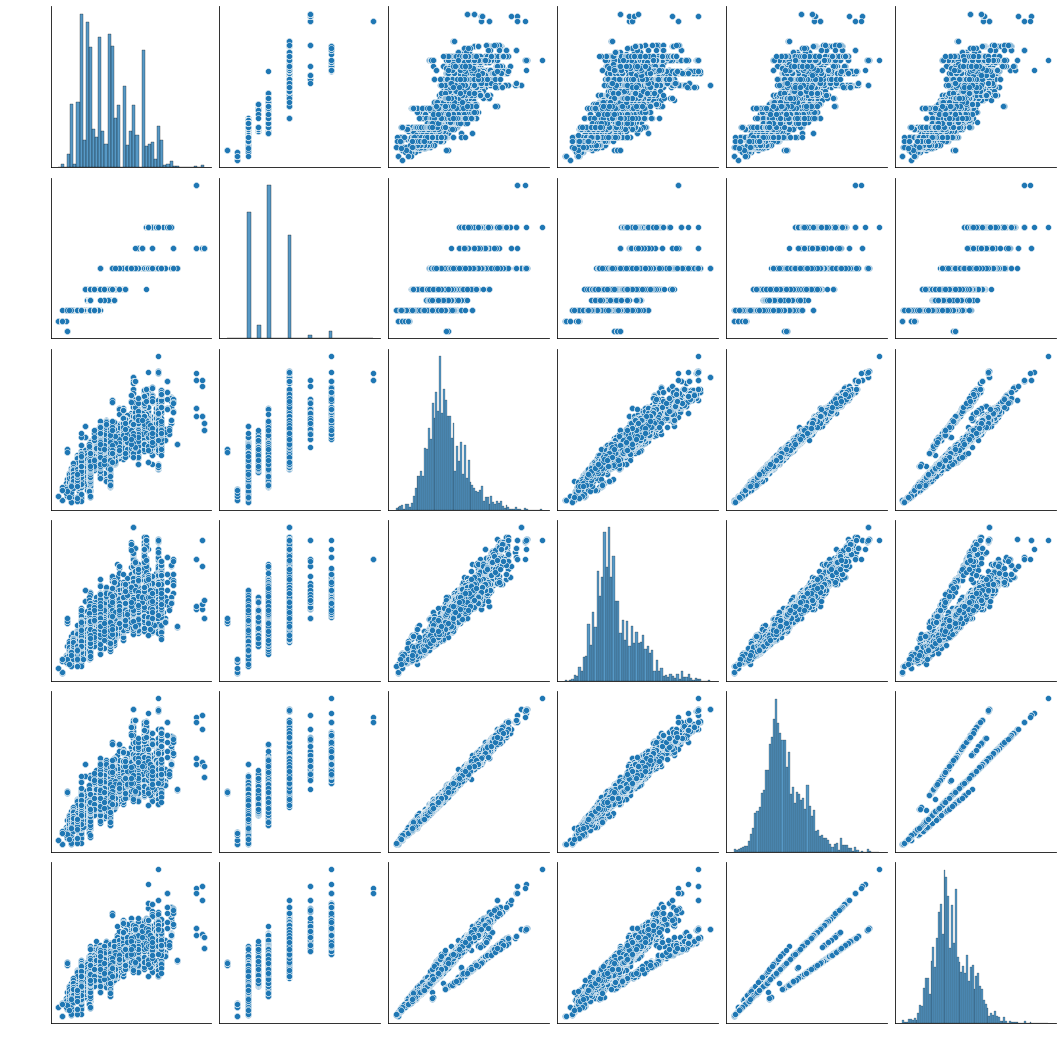

In [13]:
data = df[['Engine_Size','Cylinders','Fuel_Consumption','HWY','COMB_L','CO2_Emissions']]
sns.pairplot(data, height=2.5)

## Creating train and test dataset

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = data[msk]
test = data[~msk]

## Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
# train set
train_x = np.asanyarray(train[['Engine_Size','Cylinders','Fuel_Consumption','HWY','COMB_L']])
train_y = np.asanyarray(train[['CO2_Emissions']])
# test set
test_x = np.asanyarray(test[['Engine_Size','Cylinders','Fuel_Consumption','HWY','COMB_L']])
test_y = np.asanyarray(test[['CO2_Emissions']])

In [16]:
poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.  ,   1.6 ,   4.  , ...,  44.89,  54.27,  65.61],
       [  1.  ,   3.2 ,   6.  , ...,  54.76,  74.  , 100.  ],
       [  1.  ,   3.5 ,   6.  , ...,  84.64, 105.8 , 132.25],
       ...,
       [  1.  ,   3.  ,   6.  , ...,  68.89,  85.49, 106.09],
       [  1.  ,   3.2 ,   6.  , ...,  60.84,  76.44,  96.04],
       [  1.  ,   3.2 ,   6.  , ...,  73.96,  96.32, 125.44]])

In [17]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  0.           9.49774768 -17.26072969 -16.54061255   2.89576391
   55.83488229   6.89972586 -11.93912683  -5.31863007   1.41658623
    6.80014387   2.23573408   7.46697535   2.0960519   -7.38162022
   -4.84455458  -1.98603907  11.37275638   5.26453906  -7.86466707
   -3.92481651]]
Intercept:  [-38.46060896]


## Evaluation


In [18]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 8.23
Residual sum of squares (MSE): 269.56
R2-score: 0.92


In [41]:
vals = []
for i in range(len(test_y_)):
    vals.append(test_y_.tolist()[i][0])

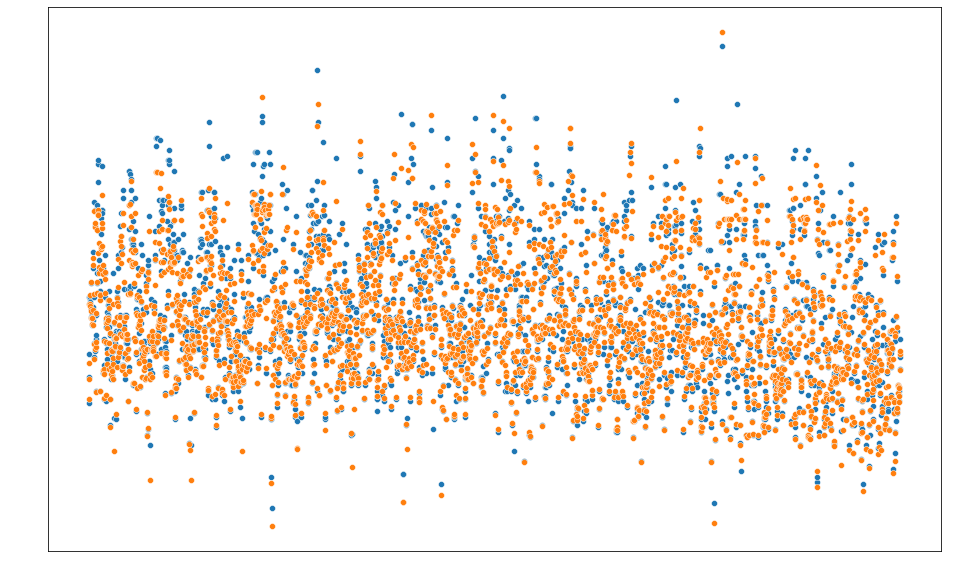

In [45]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=range(len(test)),y='CO2_Emissions',data=test)
sns.scatterplot(x=range(len(test)),y=vals)

Coefficients:  [[ 0.         61.0924128  -3.12089001]]
Intercept:  [79.29558293]
Mean absolute error: 24.88
Residual sum of squares (MSE): 1039.30
R2-score: 0.70


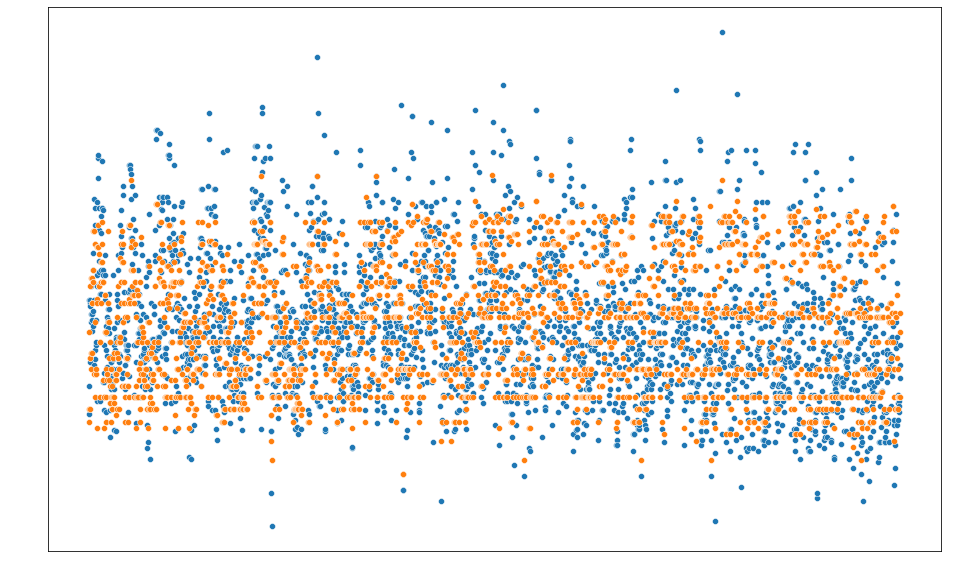

In [50]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model
# # train set
# rain_x = np.asanyarray(train[['Engine_Size']])
# rain_y = np.asanyarray(train[['CO2_Emissions']])
# # test set
# est_x = np.asanyarray(test[['Engine_Size']])
# est_y = np.asanyarray(test[['CO2_Emissions']])

# oly = PolynomialFeatures(degree = 2)
# rain_x_poly = oly.fit_transform(rain_x)
# rain_x_poly

# lf = linear_model.LinearRegression()
# rain_y_ = lf.fit(rain_x_poly, rain_y)
# print ('Coefficients: ', lf.coef_)
# print ('Intercept: ',lf.intercept_)

# est_x_poly = oly.fit_transform(est_x)
# est_y_ = lf.predict(est_x_poly)

# print("Mean absolute error: %.2f" % np.mean(np.absolute(est_y_ - est_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((est_y_ - est_y) ** 2))
# print("R2-score: %.2f" % r2_score(est_y , est_y_))

# als = []
# for i in range(len(est_y_)):
#     als.append(est_y_.tolist()[i][0])
# plt.figure(figsize=(16,10))
# sns.scatterplot(x=range(len(test)),y='CO2_Emissions',data=test)
# sns.scatterplot(x=range(len(test)),y=als)